## Комп'ютерний практикум №8
- з Обробки Біо-Медичних Даних
- студентки ФБМІ, групи БС-81
- Дворіцької Олени

## Завдання 
 - Розрахувати та вивести у вигляді таблиці статистичні характиристики даних (середні та стандартні відхилення для кожної з груп).
 - Побудувати графік розкиду в групах.
 - Побудувати функцію, що реалізовує однофакторний дисперсійний аналіз.
 - Вивести результати розрахунку кожного з етапів вказаних вище у вигляді таблиці.
 - Перевірити результат роботи функції на реальних або сгенерованих даних. Зробити висновок.

In [1]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as mp  
import math  
%matplotlib inline

In [28]:
data =  pd.DataFrame ( {
    'Nordic defense':  np.around(np.random.normal(60,14,15)), 
    'Sicilian Defense':  np.around(np.random.normal(60,14,15)), 
    'Old Indian Defense':     np.around(np.random.normal(60,14,15)),
})  

print('these data show statistics in 3 chess openings between Australia"s top 15 strongest players for black') 
data

these data show statistics in 3 chess openings between Australia"s top 15 strongest players for black


,Nordic defense,Sicilian Defense,Old Indian Defense
0,62.0,69.0,52.0
1,49.0,77.0,82.0
2,55.0,59.0,61.0
3,64.0,64.0,64.0
4,82.0,85.0,64.0
5,15.0,29.0,66.0
6,43.0,40.0,44.0
7,65.0,39.0,62.0
8,60.0,43.0,53.0
9,56.0,61.0,74.0


In [29]:
c_names=list(data.columns) 
first_values=np.array(data[c_names[0]]) 
second_values=np.array(data[c_names[1]]) 
third_values=np.array(data[c_names[2]])  


n_data= pd.DataFrame({'mean' : {'Nordic defense': np.mean(first_values), 'Sicilian Defense' :np.mean(second_values),'Old Indian Defense':np.mean(third_values)},
        'standard deviation': {'Nordic defense':np.std(first_values), 'Sicilian Defense':np.std(second_values),'Old Indian Defense':np.std(third_values)}, 
                     }) 
n_data

,mean,standard deviation
Nordic defense,57.200000,16.424372
Sicilian Defense,59.066667,15.437904
Old Indian Defense,61.533333,10.575864


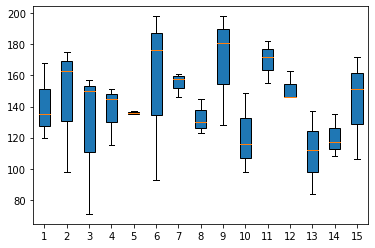

In [5]:
mp.boxplot(data, vert=True,patch_artist=True);

In [6]:
def take_column_data(data): 
    arr_with_val=[]
    c_names=list(data.columns) 
    for val in range(len(c_names)):
        arr_with_val.append(np.array(data[c_names[val]]))
    return arr_with_val

def get_T_range(data):
    arr_with_val=take_column_data(data)
    arr_with_summ=list(map(np.sum,arr_with_val))   
    arr_with_T_summ =list(map(lambda x:x*x,arr_with_summ))
    F_T=np.sum(arr_with_T_summ)
    return arr_with_summ, F_T 

def get_n(data): 
    n=int(len(data))
    return n 

def get_c():
    c=int(len(data.columns))
    return c

def get_N():
    n=get_n(data)
    n_of_columns=get_c()
    N= n*n_of_columns
    return N

def get_the_square_of_the_total(): 
    col_meanings=get_T_range(data)[0]
    square_of_the_total=np.power(np.sum(col_meanings),2)
    return square_of_the_total
   
def get_sum_squar_ind_val():
    col_meanings=np.array(take_column_data(data)).flatten()
    s_squar_ind_val=float(sum((list(map(lambda x:x*x,col_meanings)))))
    return s_squar_ind_val

In [30]:
def get_SS_intra_group(): #SSфакт
    S_F=get_T_range(data)[1]
    n=get_n(data)
    square_of_the_total_x=get_the_square_of_the_total()
    N=get_N()
    SS_fa=(S_F/n)-(square_of_the_total_x/N)
    return SS_fa
  
#SS_intr_gr=get_SS_intra_group()

In [31]:
def get_SS_total_group(): #SSзаг
    s_sq_ind_val=get_sum_squar_ind_val() 
    square_of_the_total_x=get_the_square_of_the_total()
    N=get_N() 
    SS_total_group=float(s_sq_ind_val - (square_of_the_total_x/N))
    return SS_total_group
 
#SS_total_gr=get_SS_total_group()

In [32]:
def get_SS_accidentally():
    SS_total_gr=get_SS_total_group() #SSзаг
    SS_intr_gr=get_SS_intra_group() #SSфакт
    SS_accid=SS_total_gr-SS_intr_gr
    return SS_accid 

get_SS_accidentally()

9299.06666666668

In [11]:
def get_d_fact():
    c=get_c()
    d_fact=int(c-1)
    return d_fact

In [12]:
def get_d_comm():
    N=get_N()
    d_comm=N-1
    return d_comm

In [13]:
def get_d_accidentally():
    d_fact=get_d_fact()
    d_comm=get_d_comm() 
    d_acc=d_comm-d_fact
    return d_acc

In [14]:
def get_MS_SS_fact():
    SS_fact=get_SS_intra_group()
    d_fact=get_d_fact() 
    MS_SS_fact=SS_fact/d_fact 
    return MS_SS_fact

In [15]:
def get_MS_SS_accidentally():
    SS_acc=get_SS_accidentally()
    d_acc=get_d_accidentally() 
    MS_SS_acc=SS_acc/d_acc 
    return MS_SS_acc

get_MS_SS_accidentally()

847.873015873015

In [16]:
def get_F_emp():
    MS_SS_fact=get_MS_SS_fact()
    MS_SS_acc=get_MS_SS_accidentally() 
    F_emp=(MS_SS_fact)/(MS_SS_acc)
    return F_emp 

get_F_emp()

1.2762131196645716

In [35]:
def get_F_crit(): 
    f_up=round(get_MS_SS_fact()) 
    f_down=round(get_MS_SS_accidentally()) 
    F_values=pd.read_excel("Таблиця критичних значень для критерію Фішера.xlsx")   
    if(f_up>40 and f_down>130):
        return F_values.iloc[31,14] 
    elif(f_down>31):
        return F_values.iloc[f_up,14] 
    elif(f_up>40): 
        return F_values.iloc[31,f_down] 
    else:
        return F_values.iloc[f_up,f_down] 
    

print(get_F_crit())

1


In [33]:
def conclusion():
    F_em=get_F_emp()
    F_crit=get_F_crit() 
    if(F_em>F_crit):
        print('The averages of independent groups are not equal')
    else:
        print("The averages of independent groups are  equal")
    
conclusion()

The averages of independent groups are  equal


In [19]:
def out():
    counted_data = pd.DataFrame({
        'Intragroup Variance':get_SS_intra_group(), 
        'Groupwide Variance':get_SS_total_group(), 
        "Residual variance":  get_SS_accidentally(), 
        "The number of degrees of freedom (fact)":pd.Series(get_d_fact()), 
        "The number of degrees of freedom (comm)":pd.Series(get_d_comm()), 
        "The number of degrees of freedom (accident)":pd.Series(get_d_accidentally()), 
        "MS actual":get_MS_SS_fact(), 
        "MS accidentally":get_MS_SS_accidentally(), 
        'F empr':get_F_emp(), 
        'F tabl':get_F_crit(),
    }) 
    
    print(counted_data)
    
out()

   Intragroup Variance  Groupwide Variance  Residual variance  \
0          2164.133333             37774.8       35610.666667   

   The number of degrees of freedom (fact)  \
0                                        2   

   The number of degrees of freedom (comm)  \
0                                       44   

   The number of degrees of freedom (accident)    MS actual  MS accidentally  \
0                                           42  1082.066667       847.873016   

     F empr  F tabl  
0  1.276213       1  
